In [1]:
# import deeplake
# ds = deeplake.load('hub://activeloop/wiki-art')

import numpy as np
import matplotlib.pyplot as plt
from colorthief import ColorThief
color_thief = ColorThief('/home/mortirreke/Desktop/assets/alexander-ivanov_exit-from-the-last-supper.jpg')


In [2]:
palette1 = color_thief.get_palette(color_count=6)

In [3]:
palette1

[(201, 127, 68),
 (107, 90, 39),
 (151, 94, 46),
 (106, 62, 15),
 (230, 184, 134),
 (234, 181, 112)]

In [4]:
color_thief = ColorThief('/home/mortirreke/Desktop/assets/alexander-ivanov_moses-doubted-god-s-promise-to-satisfy-people-with-meat.jpg')

In [5]:
palette2 = color_thief.get_palette(color_count=6)

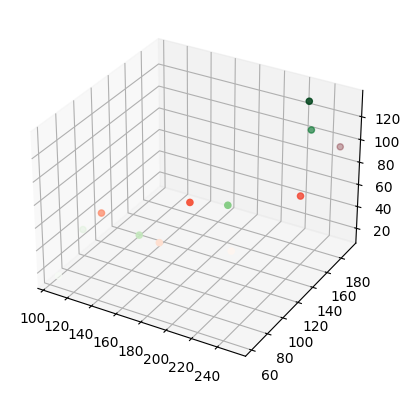

In [6]:
ax = plt.axes(projection='3d')
xdata = []
for i,x in enumerate(palette1):
    xdata.append(x[0])
ydata = []
for i,x in enumerate(palette1):
    ydata.append(x[1])
zdata = []
for i,x in enumerate(palette1):
    zdata.append(x[2])

xxdata = []
for i,x in enumerate(palette2):
    xxdata.append(x[0])
yydata = []
for i,x in enumerate(palette2):
    yydata.append(x[1])
zzdata = []
for i,x in enumerate(palette2):
    zzdata.append(x[2])

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.scatter3D(xxdata, yydata, zzdata, c=zzdata, cmap='Reds')

In [7]:
from cm_utils import compare_colorpalettes

compare_colorpalettes(palette1,palette2)

13551.90731243358


In [11]:
# import the necessary packages
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2

# initialize the index dictionary to store the image name
# and corresponding histograms and the images dictionary
# to store the images themselves
index = {}
images = {}

import os

list = []
for i, image_path in enumerate(os.listdir("/home/mortirreke/Desktop/assets/")):
	if image_path.endswith(".png") or image_path.endswith(".jpg") or image_path.endswith(".jpeg"):
		# if i == 4:
		# 	break
		image = cv2.imread("/home/mortirreke/Desktop/assets/" + image_path)
		images[image_path] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
			[0, 256, 0, 256, 0, 256])
		hist = cv2.normalize(hist, hist).flatten()
		index[image_path] = hist

In [45]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
	("Correlation", cv2.HISTCMP_CORREL),
	("Chi-Squared", cv2.HISTCMP_CHISQR),
	("Intersection", cv2.HISTCMP_INTERSECT),
	("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
	# initialize the results dictionary and the sort
	# direction
	results = {}
	reverse = False
	# if we are using the correlation or intersection
	# method, then sort the results in reverse order
	if methodName in ("Correlation", "Intersection"):
		reverse = True

# loop over the index
for (k, hist) in index.items():
	# compute the distance between the two histograms
	# using the method and update the results dictionary
	d = cv2.compareHist(index["diego-rivera_death-of-the-capitalist-1928.jpg"], hist, cv2.HISTCMP_BHATTACHARYYA)
	results[k] = d
# sort the results
results = sorted([(v, k) for (k, v) in results.items()], reverse = False)

In [44]:
print(results)

[(0.0, 'diego-rivera_death-of-the-capitalist-1928.jpg'), (0.3177030962993058, 'giacomo-balla_a-worker-s-day-1904.jpg'), (0.32539410921834916, 'jacques-stella_the-pilgrims-of-emmaus.jpg'), (0.3370211927352557, 'edgar-degas_seated-woman-combing-her-hair.jpg'), (0.34364432383973115, 'images_1394.jpg'), (0.35393593941741186, 'jose-malhoa_the-artist-s-studio-1894.jpg'), (0.3712222291561389, 'pavel-filonov_a-couple-1912.jpg'), (0.3713239378906038, 'images_1972.jpg'), (0.37659165537086836, 'raphael_st-cecilia-with-saints-detail-1516.jpg'), (0.3767944722971881, 'giorgio-de-chirico_self-portrait-1949.jpg'), (0.37723434437049536, 'images_2642.jpg'), (0.38330853555404293, 'vela-zanetti_the-merengue-1955.jpg'), (0.3843529741726462, 'willem-van-genk_zelfportret-zwakzinnigennazorg-1990.jpg'), (0.38557006799317733, 'nicolas-poussin_the-assumption-of-the-virgin-1650.jpg'), (0.3863194196221543, 'images_347.jpg'), (0.38875084843000496, 'giotto_the-dream-of-innocent-iii-1299.jpg'), (0.3901724133926763, '

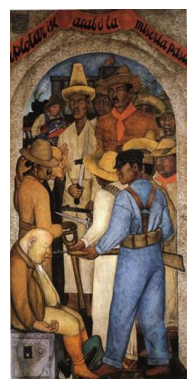

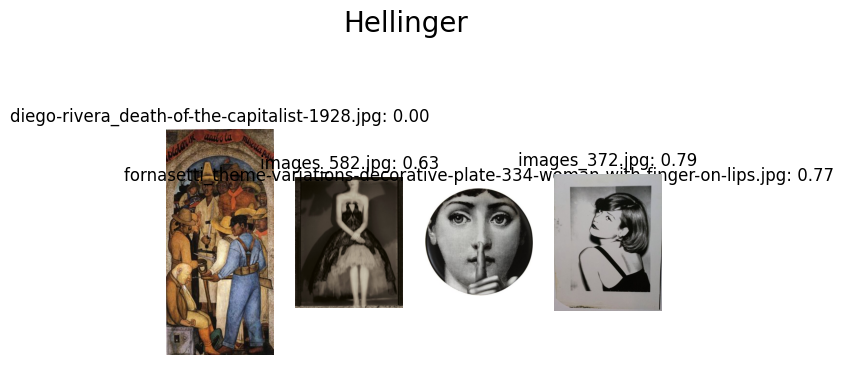

In [32]:

# show the query image
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images["diego-rivera_death-of-the-capitalist-1928.jpg"])
plt.axis("off")
# initialize the results figure
fig = plt.figure("Results: %s" % (methodName))
fig.suptitle(methodName, fontsize = 20)
# loop over the results
for (i, (v, k)) in enumerate(results):
	# show the result
	ax = fig.add_subplot(1, len(images), i + 1)
	ax.set_title("%s: %.2f" % (k, v))
	plt.imshow(images[k])
	plt.axis("off")
# show the OpenCV methods
plt.show()